In [1]:
import os
import pandas as pd
import cv2
import numpy as np
import re

# Define the directory containing the movies
stimuli_dir = "Stimuli"

# Get a list of all .mp4 files in the directory
movie_files = [f for f in os.listdir(stimuli_dir) if f.endswith(".mp4")]

# Create a pandas DataFrame with the filenames
df = pd.DataFrame(movie_files, columns=["Filename"])
df


,Filename
0,JvG_D_02.mp4
1,AL_N_06.mp4
2,AL_F_08.mp4
3,BP_F_02.mp4
4,AK_N_01.mp4
5,AK_H_15.mp4
6,AK_N_09.mp4
7,JvG_H_03.mp4
8,AL_P_20.mp4
9,JvG_F_13.mp4


In [2]:
# function to calculate motion energy for each movie

def calculate_motion_energy(movie_path):
    # Open the video file
    cap = cv2.VideoCapture(movie_path)
    
    if not cap.isOpened():
        raise ValueError(f"Cannot open video: {movie_path}")
    
    # List to store all frames
    frames = []

    # Read all frames from the video
    while True:
        ret, frame = cap.read()
        if not ret:
            break  # Stop when no more frames are available
        
        # Convert frame to grayscale (2D array)
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(gray_frame)
    
    cap.release()

    # Convert the list of frames to a 3D numpy array (time, height, width)
    frames = np.array(frames)

    # Calculate variance across the time axis (axis=0)
    pixel_variance = np.std(frames, axis=0)

    # Return the sum of all variances (motion energy)
    return np.sum(pixel_variance)


In [3]:
%%time

# calculate motion energy for each movie

df["Motion_Energy"] = df["Filename"].apply(lambda x: calculate_motion_energy(os.path.join(stimuli_dir, x)))


CPU times: user 30.3 s, sys: 11.6 s, total: 41.9 s
Wall time: 21.1 s


In [20]:
import re

# Function to extract the emotion from the filename
def extract_emotion(filename):
    match = re.match(r"^[^_]+_([^_]+)_", filename)  # Regex to capture the emotion
    if match:
        return match.group(1)  # Return the emotion letter (e.g., D, N, F)
    else:
        return None  # If no match, return None (or you can use 'Unknown' as default)

# Apply the function to the DataFrame
df['Emotion'] = df['Filename'].apply(extract_emotion)

# Define the mapping of letters to emotion names
emotion_map = {
    'D': 'Disgust',
    'N': 'Neutral',
    'F': 'Fear',
    'H': 'Happy',
    'P': 'Pain',
    'A': 'Anger',
    'S': 'Sadness'
}

df['Emotion_Type'] = df['Emotion'].map(emotion_map)
df

,Filename,Motion_Energy,Emotion,Emotion_Type
0,JvG_D_02.mp4,1.710592e+06,D,Disgust
1,AL_N_06.mp4,9.773568e+05,N,Neutral
2,AL_F_08.mp4,1.712628e+06,F,Fear
3,BP_F_02.mp4,2.055008e+06,F,Fear
4,AK_N_01.mp4,1.368952e+06,N,Neutral
5,AK_H_15.mp4,3.048367e+06,H,Happy
6,AK_N_09.mp4,1.435352e+06,N,Neutral
7,JvG_H_03.mp4,1.380019e+06,H,Happy
8,AL_P_20.mp4,2.348732e+06,P,Pain
9,JvG_F_13.mp4,3.193946e+06,F,Fear


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Group by 'Emotion' and calculate mean and std for 'Motion_Energy'
summary_df = df.groupby('Emotion_Type')['Motion_Energy'].agg(['mean', 'std']).reset_index()
summary_df


,Emotion_Type,mean,std
0,Anger,2.067228e+06,4.693106e+05
1,Disgust,2.144770e+06,6.647483e+05
2,Fear,3.026707e+06,1.023378e+06
3,Happy,1.853482e+06,6.545069e+05
4,Neutral,1.122002e+06,1.994135e+05
5,Pain,3.191899e+06,1.354042e+06
6,Sadness,2.126734e+06,6.278187e+05


<Axes: xlabel='Emotion_Type', ylabel='Motion_Energy'>

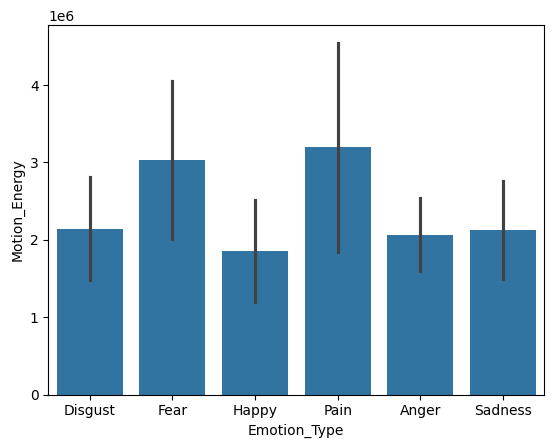

In [31]:

df_NN = df[df['Emotion_Type'] != 'Neutral']

# errorbar method (either “ci”, “pi”, “se”, or “sd”)
# # https://seaborn.pydata.org/tutorial/error_bars.html
sns.barplot(df_NN, x="Emotion_Type", y="Motion_Energy", errorbar="se")


In [32]:
# ANOVA

import scipy.stats as stats

# Group the data by 'Emotion_Type' and collect 'Motion_Energy' values for each group
grouped_data = [df_NN[df_NN['Emotion_Type'] == emotion]['Motion_Energy'] for emotion in df_NN['Emotion_Type'].unique()]

# Perform the one-way ANOVA
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Print the results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


F-statistic: 3.4505753067309
P-value: 0.010584271210478086


In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Perform ANOVA using statsmodels

# Fit an OLS model (Motion_Energy ~ Emotion_Type)
model = ols('Motion_Energy ~ Emotion_Type', data=df_NN).fit()

# Perform the ANOVA
anova_table = anova_lm(model)

# Display the ANOVA table
print(anova_table)


                df        sum_sq       mean_sq         F    PR(>F)
Emotion_Type   5.0  1.255265e+13  2.510529e+12  3.450575  0.010584
Residual      42.0  3.055787e+13  7.275684e+11       NaN       NaN
